In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
# from konlpy.tag import Okt
df = pd.read_excel("2011_2020 대구인구(not 코로나).xlsx")

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
tmp = df["특성추출(가중치순 상위 50개)"].apply(lambda x: str(x).split(','))
stop_words=['65세','통계청','관계자','만큼','1만','2만','3만','1천','2천','3천','10만','코로나19','5만','위원회','지자체','새누리당','정의당','광역시','국회의원','경쟁력','그동안','일본','중국','미국',
'한국당','더불어민주당','문재인','부여','홈페이지','리얼미터','민주당','1위','지역구','선거구','지지층','지지율','공무원','위원장','안철수','사람들','가능성','이철우',
'울산','대구','부산','전남','대구시','경북','광주','전북','경남','충남','강원','경북도','제주','충북','달성군','달서구','대구경북','대한민국','한국','우리나라','충청','호남','영남','대구경북','구미','서울','수도권','인천','세종시',
'포항','청주','충주','세종','춘천','수원','전주','창원','중구','동구','남구','수성구']

cont = []
for i in range(len(tmp)):
    cont.append([word for word in tmp.iloc[i] if word not in stop_words])
tmp2 = pd.Series(cont)

df_words = [word for words in tmp for word in words if word not in stop_words]
Counter(df_words).most_common(25)


[('일자리', 1359),
 ('부동산', 1226),
 ('경기도', 786),
 ('행정안전부', 760),
 ('20대', 703),
 ('50대', 679),
 ('30대', 678),
 ('40대', 659),
 ('전문가', 616),
 ('지역별', 604),
 ('60대', 584),
 ('인구', 580),
 ('자동차', 568),
 ('활성화', 530),
 ('여론조사', 528),
 ('지지도', 519),
 ('주민들', 474),
 ('유권자', 470),
 ('권영진', 456),
 ('관광객', 438),
 ('시민들', 437),
 ('2위', 435),
 ('사망자', 432),
 ('혁신도시', 430),
 ('vs', 427)]

In [4]:
from apyori import apriori
result = (list(apriori(tmp2, min_support=0.01)))
df_apy=pd.DataFrame(result)
df_apy['length'] =df_apy['items'].apply(lambda x: len(x))
df_apy= df_apy[(df_apy['length'] ==2 ) &  #항목이 2개
            (df_apy['support']>=0.01)].sort_values(by='support',ascending=False)
top_100= df_apy.head(100).sort_values(by=['support'],ascending=False)        
top_100

,items,support,ordered_statistics,length
142,"(50대, 40대)",0.01895,"[((), (50대, 40대), 0.01895, 1.0), ((40대), (50대)...",2
139,"(40대, 30대)",0.01835,"[((), (40대, 30대), 0.01835, 1.0), ((30대), (40대)...",2
135,"(20대, 30대)",0.01820,"[((), (20대, 30대), 0.0182, 1.0), ((20대), (30대),...",2
136,"(20대, 40대)",0.01625,"[((), (20대, 40대), 0.01625, 1.0), ((20대), (40대)...",2
140,"(50대, 30대)",0.01595,"[((), (50대, 30대), 0.01595, 1.0), ((30대), (50대)...",2
137,"(50대, 20대)",0.01575,"[((), (50대, 20대), 0.01575, 1.0), ((20대), (50대)...",2
144,"(50대, 60대)",0.01520,"[((), (50대, 60대), 0.0152, 1.0), ((50대), (60대),...",2
143,"(40대, 60대)",0.01340,"[((), (40대, 60대), 0.0134, 1.0), ((40대), (60대),...",2
138,"(20대, 60대)",0.01275,"[((), (20대, 60대), 0.01275, 1.0), ((20대), (60대)...",2
141,"(60대, 30대)",0.01235,"[((), (60대, 30대), 0.01235, 1.0), ((30대), (60대)...",2


C:\Users\user\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


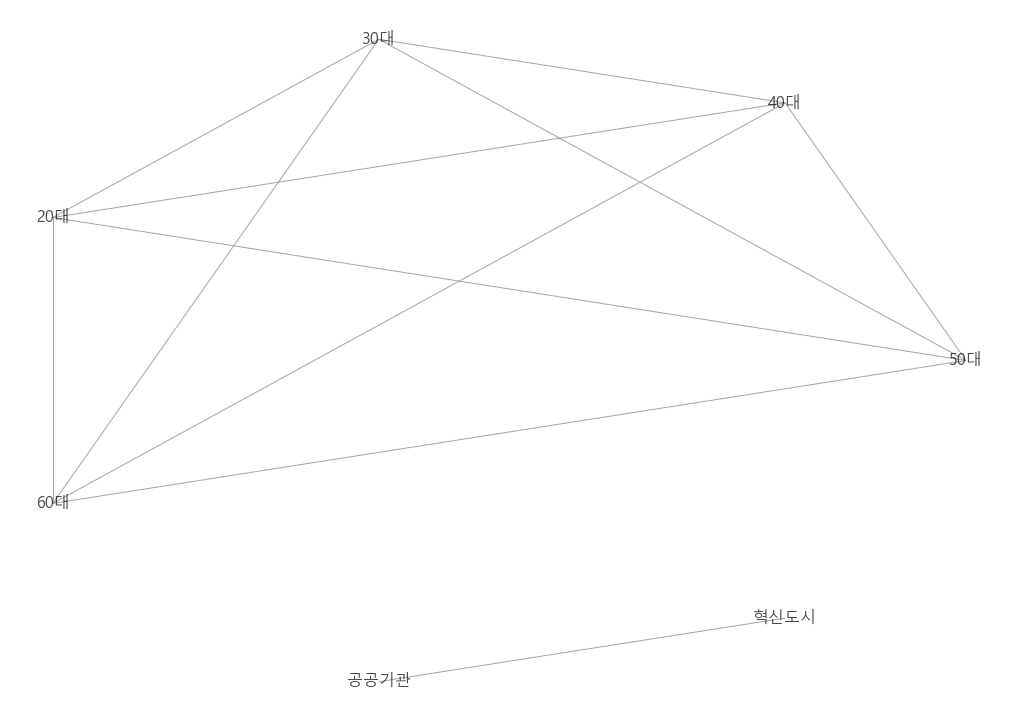

In [5]:
G = nx.Graph()
ar=(top_100['items']) ; G.add_edges_from(ar)
pr =nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize =2000* (nsize-min(nsize)/max(nsize)-min(nsize))

pos = nx.circular_layout(G)

plt.figure(figsize=(18,13)); plt.axis('off')
nx.draw_networkx(G,font_family='Malgun Gothic',font_size=16,
                pos=pos, node_color =list(pr.values()), node_size=nsize,
                alpha = 0.7, edge_color ='.5', cmap=plt.cm.YlGn)